# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import pickle

# Data Cleaning and Exploration

In [2]:
iris = pd.read_csv('IRIS.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris.duplicated().sum()

3

In [6]:
iris_clean = iris.drop_duplicates()

In [7]:
iris_clean.duplicated().sum()

0

In [8]:
iris_clean['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

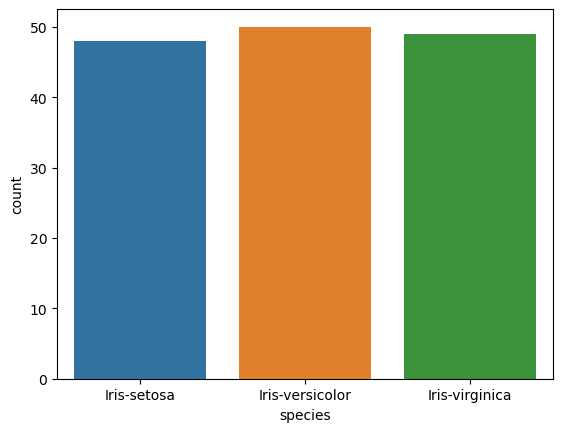

In [9]:
sn.countplot(x = 'species', data = iris_clean)
plt.show()

C:\Users\wickn\AppData\Local\Temp\ipykernel_16156\850241073.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sn.barplot(x = 'species', y = 'sepal_length', data = iris_clean, ci = False)


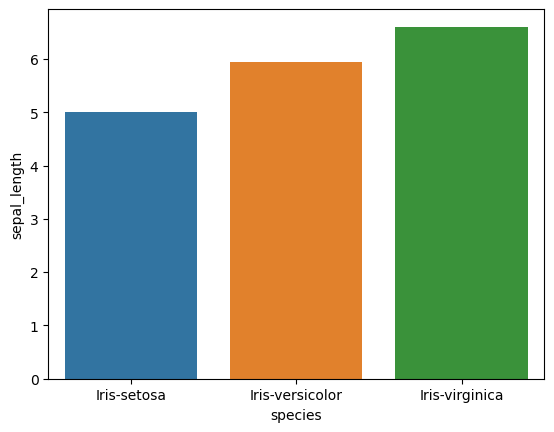

In [10]:
sn.barplot(x = 'species', y = 'sepal_length', data = iris_clean, ci = False)
plt.show()

In [11]:
iris_clean.replace({'species' : {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}}, inplace = True)

C:\Users\wickn\AppData\Local\Temp\ipykernel_16156\3089462186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_clean.replace({'species' : {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}}, inplace = True)


In [12]:
iris_clean

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
iris_clean.to_csv('Cleaned_Iris.csv', index = False)

# Model

In [14]:
X = iris_clean.drop(columns = 'species')
y = iris_clean['species']
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[147 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 1)
X_train

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
4,5.0,3.6,1.4,0.2
87,6.3,2.3,4.4,1.3
130,7.4,2.8,6.1,1.9
72,6.3,2.5,4.9,1.5
...,...,...,...,...
41,4.5,2.3,1.3,0.3
51,6.4,3.2,4.5,1.5
24,4.8,3.4,1.9,0.2
3,4.6,3.1,1.5,0.2


In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
x_train_pred = knn.predict(X_train)
x_train_acc = accuracy_score(x_train_pred, y_train)
print('Accuracy on training data : ', x_train_acc)

Accuracy on training data :  0.9818181818181818


In [19]:
x_test_pred = knn.predict(X_test)
x_test_acc = accuracy_score(x_test_pred, y_test)
print('Accuracy on testing data : ', x_test_acc)

Accuracy on testing data :  0.972972972972973


In [20]:
pickle.dump(knn, open('iris_classifier', 'wb'))